In [1]:
# coding: utf-8
# Name: André Moreira Souza
# NUSP: 9778985
# Course Code: SCC0251
# Semester: 2019/1
# Assignment: 2 - Image enhancement and filtering

In [2]:
import numpy as np
import imageio

In [3]:
import matplotlib.pyplot as plt # remove later

## Defining functions

In [57]:
# method 1 - limiarization
def limiarization(img, t0):
    # calculating threshold
    t = 0.5 * (np.nanmean(np.where(img > t0, img, np.NaN)) + np.nanmean(np.where(img <= t0, img, np.NaN)))
    while(abs(t-t0) > 0.5):
        t0 = t
        m1 = np.nanmean(np.where(img > t, img, np.NaN)) # mean of group1
        m2 = np.nanmean(np.where(img <= t, img, np.NaN)) # mean of group2
        t = 0.5 * (m1 + m2)
    return np.where(img > t, 1, 0)

# method 2 - 1d filtering
def filter1d(img, w):
    # flattening img
    imgFlat = img.flatten()
    # creating new array and applying filter
    imgFinal = np.zeros(imgFlat.shape, dtype=np.double)
    for i in range(imgFlat.shape[0]):
        imgFinal[i] = np.sum([imgFlat[(i+j) % imgFlat.shape[0]] * w[j] for j in range(len(w))])
    return imgFinal.reshape(img.shape)
    

# method 3 - 2d filtering
# def filter2d():

# method 4 - 2d median filter
# def medianFilter2d():

## Main function

In [61]:
if __name__ == '__main__':
    # get user input
    filename = str(input()).strip()
    method = np.uint8(input())
    if method == 1:
        t0 = np.double(input())
    elif method == 2:
        n = np.uint(input())
        w = np.array(input().split(), dtype=np.double)
    elif method == 3:
        n = np.uint(input())
        w = np.array([input().split() for i in range(n)], dtype=np.double)
        t0 = np.double(input())
    elif method == 4:
        n = np.uint(input())
    else:
        raise ValueError("method value not in supported range (minimum = 1, maximum = 4).")
    

## Additional tests

In [63]:
img = imageio.imread(filename)

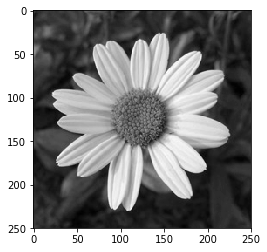

In [64]:
plt.imshow(img, cmap='gray')

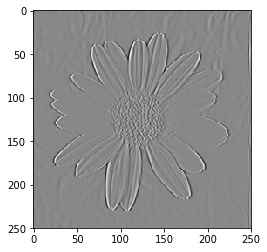

In [66]:
plt.imshow(filter1d(img, w), cmap='gray')

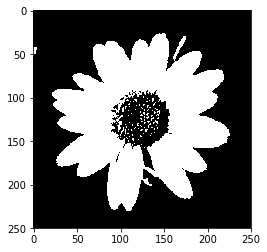

In [65]:
plt.imshow(limiarization(img, t0), cmap='gray')